<a href="https://colab.research.google.com/github/vifirsanova/llm-dmt/blob/main/get_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python -m pip install -U angle-emb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.2/192.2 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.

In [ ]:
import torch
from angle_emb import AnglE, Prompts
from angle_emb.utils import cosine_similarity

angle = AnglE.from_pretrained('NousResearch/Llama-2-7b-hf',
                              pretrained_lora_path='SeanLee97/angle-llama-7b-nli-v2',
                              pooling_strategy='last',
                              is_llm=True,
                              torch_dtype=torch.float16).cuda()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/746 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/435 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:774: UserWarning: `return_dict_in_generate` is NOT set to `True`, but `output_hidden_states` is. When `return_dict_in_generate` is not `True`, `output_hidden_states` is ignored.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

adapter_config.json:   0%|          | 0.00/585 [00:00<?, ?B/s]

adapter_model.bin:   0%|          | 0.00/320M [00:00<?, ?B/s]

In [ ]:
Prompts.list_prompts()

doc_vec = angle.encode([
    {'text': 'Most countries have systems.'},
    {'text': 'Varies implementation of these practices.'},
    {'text': 'Implementation of these practices will varied.'}
], prompt=Prompts.C)

doc_vec

Prompts.A = 'Summarize sentence "{text}" in one word:"'
Prompts.B = 'You can only output one word. Summarize "{text}":"'
Prompts.C = 'Represent this sentence for searching relevant passages: {text}'


array([[-0.7529297 ,  1.5673828 ,  3.578125  , ...,  0.47509766,
         2.0800781 ,  0.86083984],
       [-0.6591797 ,  1.6279297 ,  3.8671875 , ...,  0.37817383,
         1.5654297 ,  0.82177734],
       [-0.99902344,  1.8476562 ,  3.5996094 , ...,  0.10827637,
         1.4072266 ,  0.9423828 ]], dtype=float32)

In [ ]:
Prompts.list_prompts()

doc_vec = angle.encode([
    {'text': 'This'},
    {'text': 'is'},
    {'text': 'a'},
    {'text': 'sample'},
    {'text': 'sentence'}
], prompt=Prompts.C)

doc_vec

Prompts.A = 'Summarize sentence "{text}" in one word:"'
Prompts.B = 'You can only output one word. Summarize "{text}":"'
Prompts.C = 'Represent this sentence for searching relevant passages: {text}'


array([[ 0.07928467,  0.2310791 ,  1.5292969 , ...,  0.4934082 ,
        -1.0556641 ,  0.46728516],
       [-0.37548828, -1.8476562 ,  0.48779297, ...,  0.00518036,
         0.48828125,  0.04760742],
       [-0.37109375, -0.63427734, -0.1274414 , ...,  0.3017578 ,
         0.6582031 ,  0.32055664],
       [-2.4082031 ,  0.76904297, -0.41577148, ...,  0.08520508,
         0.6845703 ,  1.4423828 ],
       [-3.3710938 , -0.13769531,  2.3515625 , ...,  0.7133789 ,
        -0.40893555, -0.08282471]], dtype=float32)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(doc_vec)

In [ ]:
labels = ['This', 'is', 'a', 'sample', 'sentence']

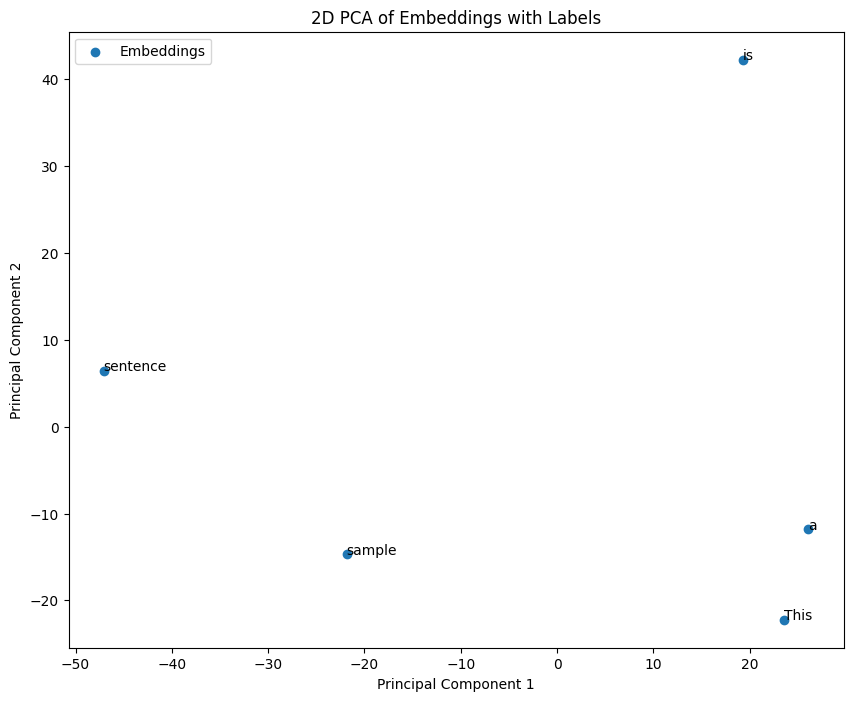

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], label='Embeddings')

for i, label in enumerate(labels):
    plt.annotate(label, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.title('2D PCA of Embeddings with Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=3, random_state=42)
embeddings_2d = tsne.fit_transform(doc_vec)

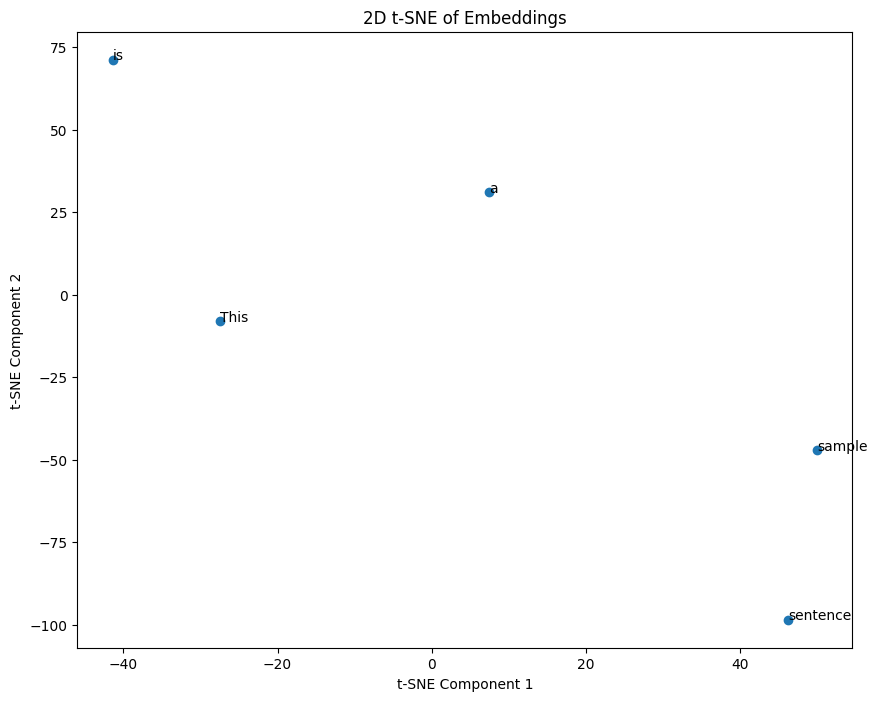

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])

for i, label in enumerate(labels):
    plt.annotate(label, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.title('2D t-SNE of Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [ ]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes to the graph
for i, label in enumerate(labels):
    G.add_node(i, label=label, pos=(embeddings_2d[i, 0], embeddings_2d[i, 1]))

# Add edges to the graph (example: create a simple sequence)
for i in range(len(labels) - 1):
    G.add_edge(i, i + 1)

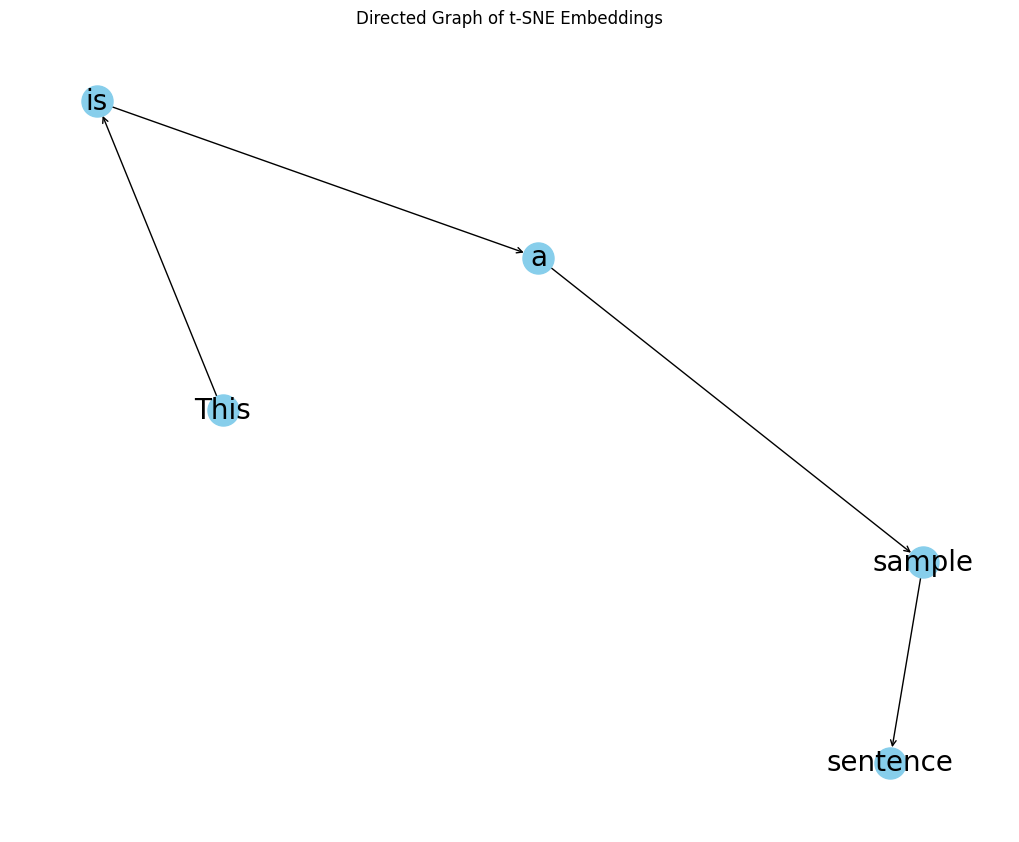

In [ ]:
import matplotlib.pyplot as plt

# Get positions of the nodes
pos = nx.get_node_attributes(G, 'pos')

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=False, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', arrows=True, arrowstyle='->', arrowsize=10)

node_labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=20, font_color='black')

plt.title('Directed Graph of t-SNE Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()